In [70]:
import json
import requests
from keras import optimizers
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb


sns.set_palette('Set2')
%matplotlib inline

In [71]:
df=pd.read_csv('../data/input_data/bitfinix.csv')
df.time = pd.to_datetime(df.time, unit='ms')
df = df.set_index('time')

In [72]:
split_row = len(df) - int(0.2 * len(df))
train_data = df.iloc[:split_row]
test_data = df.iloc[split_row:]

In [73]:
ind=df[1931696:2414618].index.tolist()

In [74]:
x_train = train_data[['high','low','open','volume']]
y_train = train_data[['close']]
x_test = test_data[['high','low','open','volume']]
y_test = test_data[['close']]

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler1 = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
y_train = scaler1.fit_transform(y_train)
x_test = scaler.transform(x_test)
y_test = scaler1.transform(y_test)

In [78]:
from sklearn.ensemble import RandomForestRegressor
xgb_model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.99)
xgb_model.fit(x_train, y_train);


[21:17:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [79]:
preds = xgb_model.predict(x_test)

In [80]:
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print("Root Mean Squared Error(RMSE) : ", sqrt(mean_squared_error(y_test,preds)))
print("Mean Absolute Error(MAE) : ", mean_absolute_error(y_test,preds))
r2 =  r2_score(y_test, preds)
print("R Squared (R2) : ",r2)


Root Mean Squared Error(RMSE) :  37.79621094009048
Mean Absolute Error(MAE) :  24.585687645775888
R Squared (R2) :  0.9998018360195022


In [60]:
n = len(x_train)
p = len(x_train[0])
num = (1-r2)*(n-1)
denom = (n-p-1)
r2_adj = 1-(num/denom)
print("Adjusted R2 : ",r2_adj)

Adjusted R2 :  0.9999807778721899


In [61]:
y_inv=scaler1.inverse_transform(y_test).tolist()

In [62]:
y_list = [item for sublist in y_inv for item in sublist]
pred_lst=scaler1.inverse_transform([preds])[0].tolist()


/home/divya_kaushik1010/.local/lib/python3.5/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


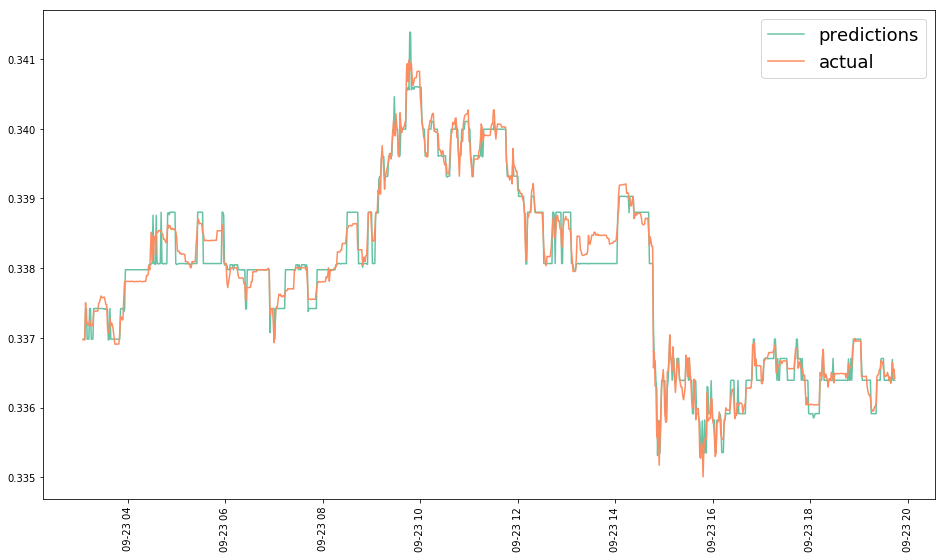

In [63]:
fig, ax = plt.subplots(1, figsize=(16, 9))
ax.plot(ind[0:1000],preds[0:1000],label='predictions')
ax.plot(ind[0:1000],y_test[0:1000],label='actual')
ax.legend(loc='best', fontsize=18)
plt.xticks(rotation=90)
plt.show()